<a href="https://colab.research.google.com/github/MiladQolami/BasicNeuralDataAnalysis/blob/main/MainCode.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Basics of Spike Train visualization**

### Experimental paradigm

---
The data used in this notebook is a single session of electrophysiological recording from a Macaque monkey's inferiotemporal cortex.The monkey was passively viewing a display while face and non-face images were presented in rapid serial visual presentation (RSVP) fasion.


<img scr="https://github.com/MiladQolami/BasicNeuralDataAnalysis/blob/main/SpikeTrianVisualization/Python/Paradigm%20copy.jpg?raw=1" class= 'bg-primary'>

<img src="https://github.com/MiladQolami/BasicNeuralDataAnalysis/blob/main/SpikeTrianVisualization/Python/Paradigm%20copy.jpg?raw=1">

### Loadng data, importing packages and defining initial parameters


In [1]:
!git clone https://github.com/MiladQolami/BasicNeuralDataAnalysis

Cloning into 'BasicNeuralDataAnalysis'...
remote: Enumerating objects: 138, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (11/11), done.
remote: Total 138 (delta 3), reused 0 (delta 0), pack-reused 127
Receiving objects: 100% (138/138), 922.03 KiB | 10.72 MiB/s, done.
Resolving deltas: 100% (37/37), done.


In [9]:
import matplotlib.pyplot as plt # imprort pyplot submodule from matplotlib
import numpy as np
import scipy.io as sio
from scipy.signal import savgol_filter
%matplotlib inline
plt.rcParams["figure.figsize"] = (10,6)

In [7]:
spikes = sio.loadmat('/content/BasicNeuralDataAnalysis/SpikeTrianVisualization/SpikesIT.mat')
type(spikes)
spikes.keys()
spikes = spikes['Spikes']
trail_num = np.shape(spikes)[0]

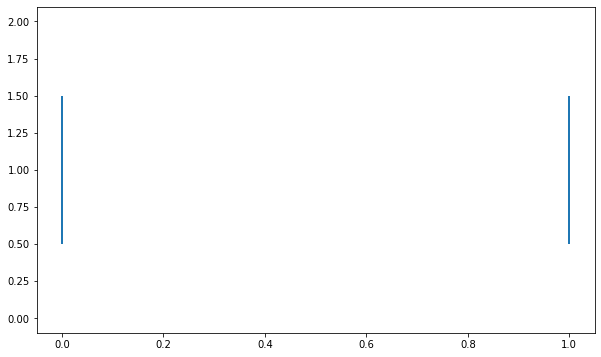

In [18]:
# make data
X, Y = np.meshgrid(np.linspace(-3, 3, 16), np.linspace(-3, 3, 16))
Z = (1 - X/2 + X**5 + Y**3) * np.exp(-X**2 - Y**2)

# plot
fig, ax = plt.subplots()

ax.imshow(spikes)
plt.colorbar()
plt.show()





In [59]:
# make data:
np.random.seed(1)
x = [2, 4, 6]
D = np.random.gamma(4, size=(3, 50))

# plot:
fig, ax = plt.subplots()

spike_times = np.argwhere(spikes[10,:])
ax.eventplot(np.argwhere(spikes[10,:]).reshape(1,30),orientation = 'horizontal', linewidth=0.75)

# ax.set(xlim=(0, 1000),ylim=(0, 3))

plt.show()
# help(plt.eventplot)
# np.shape(spike_times)
plt.matshow(spikes*50)
plt.colorbar('hot')
plt.show()
help(plt.matshow)

Help on function matshow in module matplotlib.pyplot:

matshow(A, fignum=None, **kwargs)
    Display an array as a matrix in a new figure window.
    
    The origin is set at the upper left hand corner and rows (first
    dimension of the array) are displayed horizontally.  The aspect
    ratio of the figure window is that of the array, unless this would
    make an excessively short or narrow figure.
    
    Tick labels for the xaxis are placed on top.
    
    Parameters
    ----------
    A : array-like(M, N)
        The matrix to be displayed.
    
    fignum : None or int or False
        If *None*, create a new figure window with automatic numbering.
    
        If a nonzero integer, draw into the figure with the given number
        (create it if it does not exist).
    
        If 0, use the current axes (or create one if it does not exist).
    
        .. note::
    
           Because of how `.Axes.matshow` tries to set the figure aspect
           ratio to be the one of 

### **Raster plot**

#### A single raster 

<ipython-input-8-4a3247916022>:1: DeprecationWarning: This function is deprecated. Please call randint(1, 1550 + 1) instead
  RandomTrial = np.random.random_integers(nTrials)


[(-3.0, 3.0),
 Text(0.5, 0, 'Time(ms)'),
 Text(0.5, 1.0, 'Raster plot of a random trial')]

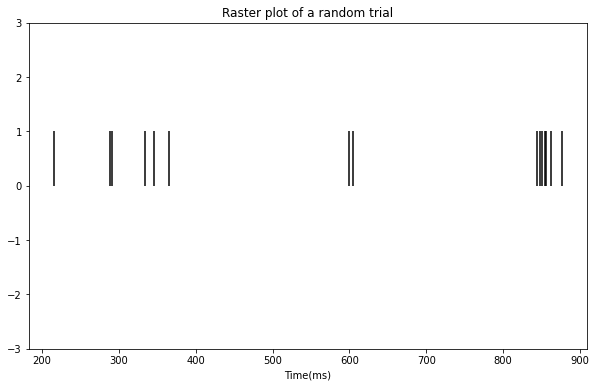

In [8]:
RandomTrial = np.random.random_integers(nTrials)
fig,ax = plt.subplots()
ax.vlines(np.argwhere(spikes[RandomTrial,:]),0,1)
ax.set(ylim=[-3,3],xlabel='Time(ms)',title='Raster plot of a random trial')


  #### Raster of all 
  In this section we devide all trials into two conditions and then plot raster for each condition. First condition are those trials where face stimuli were presented.

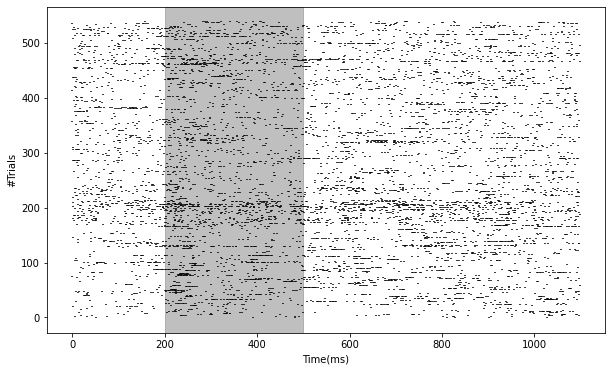

In [ ]:
StimTags = sio.loadmat('trial_idx.mat')
StimTags = StimTags['trial_idx']
FaceStimTags = StimTags[((StimTags>=0) & (StimTags<20))]
NonFaceStimTags = 
for i in range(540):
  plt.vlines(np.argwhere(spikes[i,:]),i-1,i)
plt.axvspan(200,500,color = 'gray',alpha=.5)
plt.xlabel('Time(ms)')
plt.ylabel('#Trials')
plt.show()


In [ ]:
StimTags[0]

IndexError: ignored

### **Pre Stimulus Time Histogram (PSTH)**

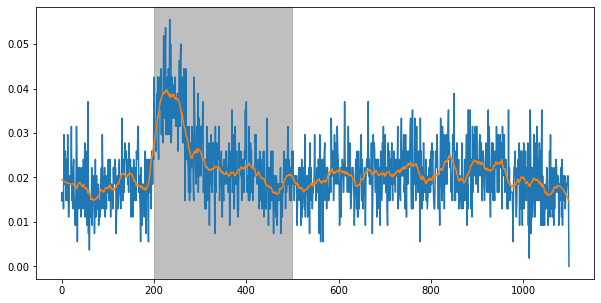

In [ ]:
mean_resp = np.mean(spikes,0)
smooth_mean_resp = savgol_filter(mean_resp,51,2)
plt.figure(figsize=(10,5))
plt.plot(mean_resp)
plt.plot(smooth_mean_resp)
plt.axvspan(200,500,color = 'gray',alpha=.5)
plt.show()

### **Inter Spike Interval** (ISI)

In [ ]:
isi = np.diff(np.where(spikes[25,:]))
print(isi)

[[  8  12  62   8   1   9 108   9   5   2  35 567]]


In [ ]:
np.where?

In [ ]:
from scipy.linalg.decomp import nonzero
